# Assignment 2 - Course 4 - 2019AIML622 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data 

In [4]:
# scaling 
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


## 4. Finding groups

### Approach 1 [ 1.5 + 3.5 marks ] 

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

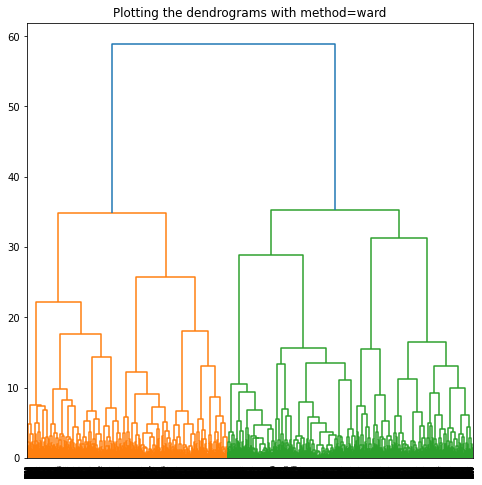

In [5]:
# dendrograms with method=ward

import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(8, 8)) 
plt.title('Plotting the dendrograms with method=ward') 

Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='ward'))) 

In [ ]:
# dendrograms with method=complete

import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(8, 8)) 
plt.title('Plotting the dendrograms with method=complete') 

Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='complete'))) 

In [ ]:
# dendrograms with method=average

import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(8, 8)) 
plt.title('Plotting the dendrograms with method=average') 

Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='average')))

#### Observation -
##### To determine the optimal number of clusters by visualizing the data,
##### imagine all the horizontal lines as being completely horizontal and then
##### after calculating the maximum distance between any two horizontal lines,
##### draw a horizontal line in the maximum distance calculated
#### The above image shows that the optimal number of clusters should be 2 for the given data.

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [ ]:
import scipy.cluster.hierarchy as shc 

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [ ]:
# clustering (hint: Use AgglomerativeClustering imported above)

from sklearn.metrics import silhouette_score 

options = { 'ward': 2, 'complete': 6, 'average': 3 }
results = []
for linkage in options.keys(): 
    no_of_clusters = options[linkage] 
    euclidean_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='euclidean', linkage=linkage)
    euclidean_model.fit(data)
    euclidean_labels = euclidean_model.labels_
    silhouette_avg = silhouette_score(data, euclidean_labels)

    results.append((linkage, no_of_clusters, 'euclidean', silhouette_avg ))
    
    if(linkage != 'ward') :
        manhattan_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='manhattan', linkage=linkage)
        manhattan_model.fit(data)
        manhattan_labels = manhattan_model.labels_
        silhouette_avg = silhouette_score(data, manhattan_labels)
 
        results.append((linkage, no_of_clusters,  'manhattan', silhouette_avg ))
        
        cosine_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='cosine', linkage=linkage)
        cosine_model.fit(data)
        cosine_labels = cosine_model.labels_
        silhouette_avg = silhouette_score(data, cosine_labels)
  
        results.append((linkage, no_of_clusters,  'cosine', silhouette_avg ))
    else:
        results.append((linkage, no_of_clusters, 'manhattan', "NA" ))
        results.append((linkage, no_of_clusters,  'cosine', "NA" ))
     
df = pd.DataFrame(results, columns =['Linkage', 'No. of Clusters', 'Distance Measure', 'Silhouette Score']) 
df.reset_index(drop=True, inplace=True) 
display( df )

In [ ]:
## Doing some more iterations

# Using k = 2 

ac2 = AgglomerativeClustering(n_clusters = 2) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
## Using k = 3

ac3 = AgglomerativeClustering(n_clusters = 3) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
# Using k = 4

ac4 = AgglomerativeClustering(n_clusters = 4) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
# Using k = 5

ac5 = AgglomerativeClustering(n_clusters = 5) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
# Using k = 6

ac6 = AgglomerativeClustering(n_clusters = 6) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
# Calculating and Appending the silhouette scores of the different models to the list 

from sklearn.metrics import silhouette_score 

k = [2, 3, 4, 5, 6] 

silhouette_scores = [] 
silhouette_scores.append( silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac6.fit_predict(X_principal))) 

print('silhouette_score for clusters - ', k)
print(silhouette_scores)

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


### Approach 2 [ 3 marks] 
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [ ]:
# clustering 

import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [ ]:
## DBSCAN
# Load data in X for eps = 0.1, min_pts = 5

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.1, min_samples = 5).fit(X_principal) 
labels = db_default.labels_ 

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

In [ ]:
## DBSCAN
# Load data in X for eps = 0.5, min_pts = 3

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.5, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

In [ ]:
## DBSCAN
# Load data in X for eps = 0.8, min_pts = 5

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.8, min_samples = 5).fit(X_principal) 
labels = db_default.labels_ 

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

## 5. Visualization [ 2 marks ] 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [ ]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 

## Approach 1 - Using k = 2

import scipy.cluster.hierarchy as shc 

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

plt.figure(figsize =(8, 8)) 
plt.title('Visualizing the data') 

Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [ ]:
## Visualizing Approach 2, Using k = 5

ac3 = AgglomerativeClustering(n_clusters = 5) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [ ]:
## End Of Assignment-2 Course-4 by 2019AIML622